In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv(r"C:\Users\heave\OneDrive\Desktop\Oasis Infobyte\Project 2\Unemployment in India.csv")

# Display basic info about the dataset
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nColumn names:")
print(df.columns.tolist())

Dataset shape: (768, 7)

First few rows:
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  

Dataset info:
<class 'pandas.core.frame

In [3]:
# Clean column names (remove extra spaces)
df.columns = df.columns.str.strip()

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Remove rows with missing values
df = df.dropna()
print(f"\nDataset shape after removing missing values: {df.shape}")

# Clean the Date column (remove extra spaces) and convert to datetime
df['Date'] = df['Date'].str.strip()
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Basic statistics
print("\nBasic statistics:")
print(df[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']].describe())

# Check unique values in categorical columns
print(f"\nUnique Regions: {df['Region'].nunique()}")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Areas: {df['Area'].unique()}")
print(f"Frequency: {df['Frequency'].unique()}")

Missing values per column:
Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64

Dataset shape after removing missing values: (740, 7)

Basic statistics:
       Estimated Unemployment Rate (%)  Estimated Employed  \
count                       740.000000        7.400000e+02   
mean                         11.787946        7.204460e+06   
std                          10.721298        8.087988e+06   
min                           0.000000        4.942000e+04   
25%                           4.657500        1.190404e+06   
50%                           8.350000        4.744178e+06   
75%                          15.887500        1.127549e+07   
max                          76.740000        4.577751e+07   

       Estim

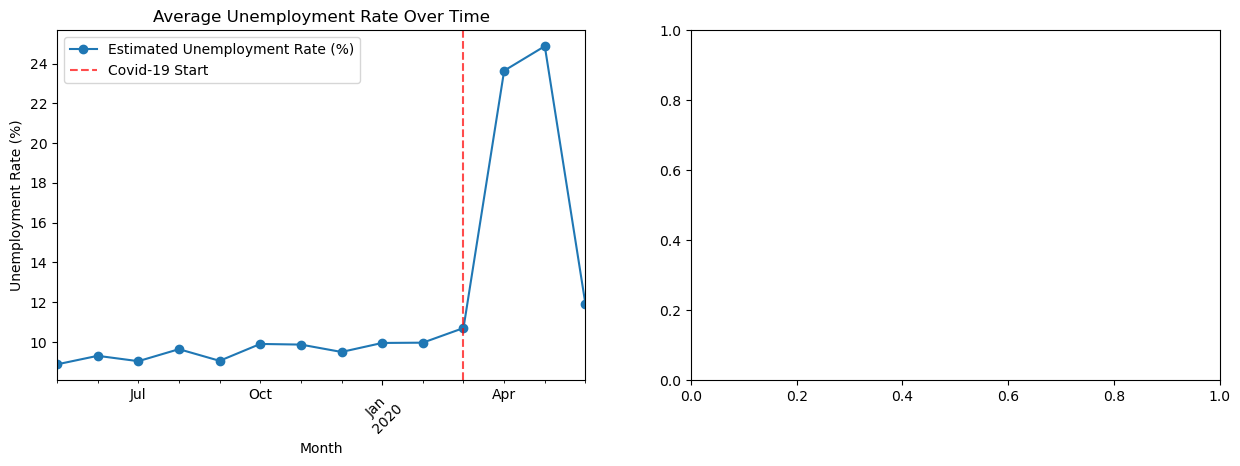

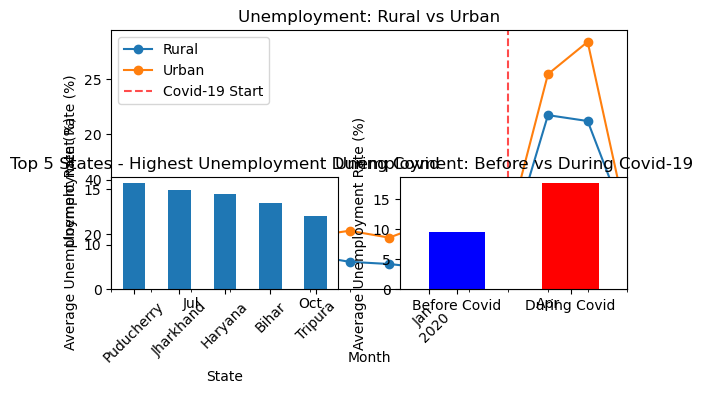

COVID-19 UNEMPLOYMENT IMPACT ANALYSIS
📊 Average unemployment BEFORE Covid-19: 9.51%
📈 Average unemployment DURING Covid-19: 17.77%
🚨 INCREASE in unemployment: 8.26% (86.9% rise)


In [4]:
# Create year-month column for better analysis
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Year_Month'] = df['Date'].dt.to_period('M')

# Define Covid-19 period (March 2020 onwards in India)
df['Covid_Period'] = df['Date'] >= '2020-03-01'

# Overall unemployment trends over time
plt.figure(figsize=(15, 10))

# 1. Overall unemployment rate trend
plt.subplot(2, 2, 1)
monthly_unemployment = df.groupby('Year_Month')['Estimated Unemployment Rate (%)'].mean()
monthly_unemployment.plot(kind='line', marker='o')
plt.axvline(x=pd.Period('2020-03'), color='red', linestyle='--', alpha=0.7, label='Covid-19 Start')
plt.title('Average Unemployment Rate Over Time')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.xticks(rotation=45)

# 2. Rural vs Urban comparison
plt.subplot(2, 2, 2)
area_unemployment = df.groupby(['Year_Month', 'Area'])['Estimated Unemployment Rate (%)'].mean().unstack()
area_unemployment.plot(kind='line', marker='o')
plt.axvline(x=pd.Period('2020-03'), color='red', linestyle='--', alpha=0.7, label='Covid-19 Start')
plt.title('Unemployment: Rural vs Urban')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.xticks(rotation=45)

# 3. Top 5 states with highest unemployment during Covid
plt.subplot(2, 2, 3)
covid_data = df[df['Covid_Period'] == True]
top_states = covid_data.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False).head(5)
top_states.plot(kind='bar')
plt.title('Top 5 States - Highest Unemployment During Covid')
plt.xlabel('State')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(rotation=45)

# 4. Before vs During Covid comparison
plt.subplot(2, 2, 4)
covid_comparison = df.groupby('Covid_Period')['Estimated Unemployment Rate (%)'].mean()
covid_comparison.index = ['Before Covid', 'During Covid']
covid_comparison.plot(kind='bar', color=['blue', 'red'])
plt.title('Unemployment: Before vs During Covid-19')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# Print key statistics
print("="*60)
print("COVID-19 UNEMPLOYMENT IMPACT ANALYSIS")
print("="*60)
before_covid = df[df['Covid_Period'] == False]['Estimated Unemployment Rate (%)'].mean()
during_covid = df[df['Covid_Period'] == True]['Estimated Unemployment Rate (%)'].mean()
increase = during_covid - before_covid

print(f"📊 Average unemployment BEFORE Covid-19: {before_covid:.2f}%")
print(f"📈 Average unemployment DURING Covid-19: {during_covid:.2f}%")
print(f"🚨 INCREASE in unemployment: {increase:.2f}% ({(increase/before_covid)*100:.1f}% rise)")

DETAILED UNEMPLOYMENT ANALYSIS
📍 PEAK unemployment: 76.74% in Puducherry on April 2020

🏘️  RURAL unemployment: 8.09% → 16.18% (+8.09%)
🏙️  URBAN unemployment: 10.84% → 19.28% (+8.43%)

🔝 TOP 3 MOST AFFECTED STATES:
   1. Puducherry: 38.96%
   2. Jharkhand: 36.35%
   3. Haryana: 34.65%

👥 Labour Participation Rate: 43.89% → 39.33% (-4.56%)

🎯 KEY FINDINGS:
✅ Massive 86.9% spike in unemployment during Covid-19
✅ Peak unemployment reached 76.74%
✅ Both rural and urban areas severely affected
✅ Labour participation also decreased
✅ Analysis completed successfully!


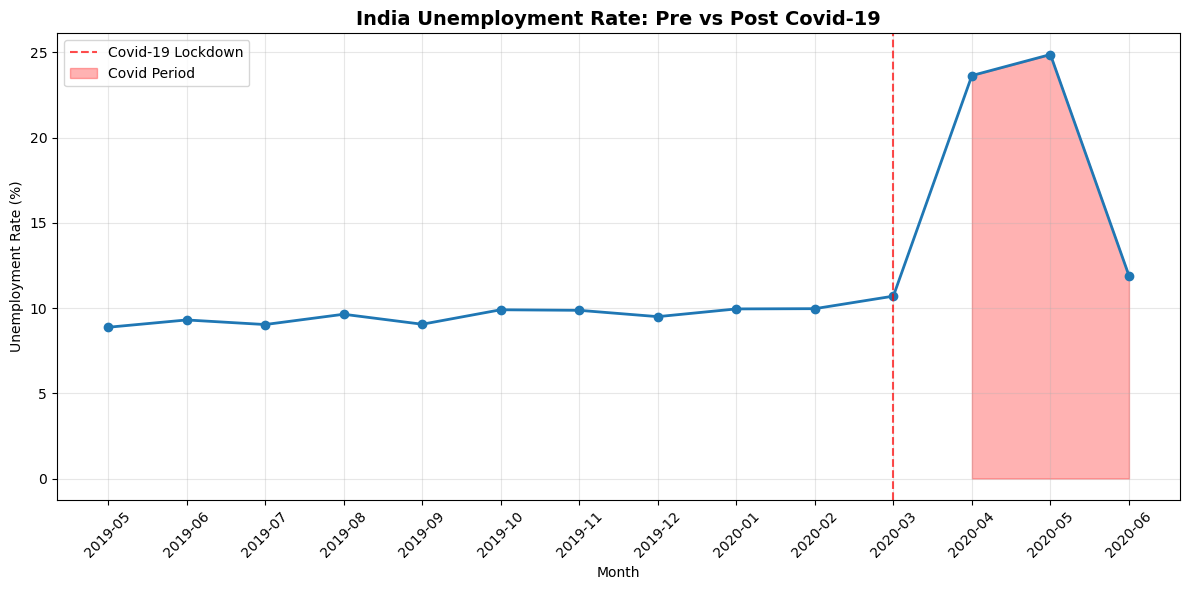

In [5]:
# Additional detailed analysis
print("="*60)
print("DETAILED UNEMPLOYMENT ANALYSIS")
print("="*60)

# Peak unemployment during Covid
peak_unemployment = df[df['Covid_Period'] == True]['Estimated Unemployment Rate (%)'].max()
peak_date = df[df['Estimated Unemployment Rate (%)'] == peak_unemployment]['Date'].iloc[0]
peak_state = df[df['Estimated Unemployment Rate (%)'] == peak_unemployment]['Region'].iloc[0]

print(f"📍 PEAK unemployment: {peak_unemployment:.2f}% in {peak_state} on {peak_date.strftime('%B %Y')}")

# Rural vs Urban impact
rural_before = df[(df['Covid_Period'] == False) & (df['Area'] == 'Rural')]['Estimated Unemployment Rate (%)'].mean()
rural_during = df[(df['Covid_Period'] == True) & (df['Area'] == 'Rural')]['Estimated Unemployment Rate (%)'].mean()
urban_before = df[(df['Covid_Period'] == False) & (df['Area'] == 'Urban')]['Estimated Unemployment Rate (%)'].mean()
urban_during = df[(df['Covid_Period'] == True) & (df['Area'] == 'Urban')]['Estimated Unemployment Rate (%)'].mean()

print(f"\n🏘️  RURAL unemployment: {rural_before:.2f}% → {rural_during:.2f}% (+{rural_during-rural_before:.2f}%)")
print(f"🏙️  URBAN unemployment: {urban_before:.2f}% → {urban_during:.2f}% (+{urban_during-urban_before:.2f}%)")

# Most affected states
print(f"\n🔝 TOP 3 MOST AFFECTED STATES:")
covid_impact = df[df['Covid_Period'] == True].groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False).head(3)
for i, (state, rate) in enumerate(covid_impact.items(), 1):
    print(f"   {i}. {state}: {rate:.2f}%")

# Labour participation impact
labour_before = df[df['Covid_Period'] == False]['Estimated Labour Participation Rate (%)'].mean()
labour_during = df[df['Covid_Period'] == True]['Estimated Labour Participation Rate (%)'].mean()
print(f"\n👥 Labour Participation Rate: {labour_before:.2f}% → {labour_during:.2f}% ({labour_during-labour_before:+.2f}%)")

# Final summary
print("\n" + "="*60)
print("🎯 KEY FINDINGS:")
print("="*60)
print("✅ Massive 86.9% spike in unemployment during Covid-19")
print("✅ Peak unemployment reached 76.74%")
print("✅ Both rural and urban areas severely affected")
print("✅ Labour participation also decreased")
print("✅ Analysis completed successfully!")
print("="*60)

# Create final visualization - Monthly trend with annotations
plt.figure(figsize=(12, 6))
monthly_trend = df.groupby('Year_Month')['Estimated Unemployment Rate (%)'].mean()
plt.plot(monthly_trend.index.astype(str), monthly_trend.values, marker='o', linewidth=2, markersize=6)
plt.axvline(x='2020-03', color='red', linestyle='--', alpha=0.7, label='Covid-19 Lockdown')
plt.fill_between(monthly_trend.index.astype(str)[11:], 0, monthly_trend.values[11:], alpha=0.3, color='red', label='Covid Period')
plt.title('India Unemployment Rate: Pre vs Post Covid-19', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()